<a href="https://colab.research.google.com/github/Julio09Angel/Inteligencia-Artificial-y-Redes-Neuronales/blob/main/CNN_Proyecto%20Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PIA.- Entrenamiento de una red neuronal convolusional.**

**Integrantes con sus respectivas matrículas:**
*   1954467 - Julio Ángel Arias Bartolo
*   1961288 - Evelyn Náñez Ibáñez
*   1949552 - Maximo Jesús De La Cruz Ledezma
*   2077613 - Carlos Adrián Torres González
*   2077896 - Margarita Ramírez Rosalino

**Hora clase:** LMV/N1

# Importación de las librerias

Hay que tener algunas de las consideraciones que se nos dieron durante la clase, como lo son las partes principales y el orden de cada una de estas. La primera parte como en casi cualquier código en progrmación, es necesario importar las librerias que necesitaremos a lo largo de todo el programa que se está trabajando.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten,Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
import os,cv2

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tabulate import tabulate

# Importación del dataset desde Kaggle

En esta parte es en donde se realiza el proceso de instalación y configuración de Kaggle dentro del entorno de Google Colaboratory. Kaggle es una plataforma en línea en donde se pueden encontrar, entre otras cosas, set de datos útiles para el uso en el aprendizaje automático.

In [ ]:
#Instalación de Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download lantian773030/pokemonclassification

 99% 412M/417M [00:04<00:00, 92.2MB/s]
100% 417M/417M [00:04<00:00, 106MB/s] 


In [ ]:
! unzip pokemonclassification.zip

Streaming output truncated to the last 5000 lines.
  inflating: PokemonData/Golbat/78bb8cd2828f40158fc0dcd4c0366a57.jpg  
  inflating: PokemonData/Golbat/7b7a064d3a1b4c53a9be936d4e4e3bab.jpg  
  inflating: PokemonData/Golbat/7d07fd6776fb40e9986a1a0f62233325.jpg  
  inflating: PokemonData/Golbat/815b279060b94e12a6b35d434a5250c2.jpg  
  inflating: PokemonData/Golbat/818014085ff04885b31eb5e8737012f2.jpg  
  inflating: PokemonData/Golbat/87529331a47b4a5cb5d10a6b3ea46d84.jpg  
  inflating: PokemonData/Golbat/914fab74d32e49a98940d5ba7f674fa6.jpg  
  inflating: PokemonData/Golbat/949a05bd0ad44be993e5fd89a8f582df.jpg  
  inflating: PokemonData/Golbat/9a4c793b9b0042a99ebd540897f9f898.jpg  
  inflating: PokemonData/Golbat/a35b4e8e603c485cb197520af30e1208.jpg  
  inflating: PokemonData/Golbat/a45a14a67a7348bba57c06467bb73cde.jpg  
  inflating: PokemonData/Golbat/acc2b44eada74a25a64c041b2e80c453.jpg  
  inflating: PokemonData/Golbat/af30483e382240d38890dec39e083b08.jpg  
  inflating: PokemonData/G

# División del set de datos y pre-procesamiento


Mediante el código siguiente se declaran las variables que definen a las imagenes de entrenamiento y prueba, así como a sus correspondientes etiquetas.

Debido a que el set de datos elegido no contiene archivo csv alguno, se deben definir las etiquetas por medio del nombre de las subcarpetas que se encuentran dentro del directorio principal "/PokemonData". Dichas subcarpetas o subdirectorios contienen en su interior imagenes de un mismo pokemon cada una, cabe aclarar que las imagenes presentan distintas extensiones.

Así mismo se aplica la normalización de los pixeles y se da una relación 80/20 en cuanto a la cantidad de imagenes de entrenaieto y de prueba.

In [ ]:
# Ruta del directorio que contiene las imágenes
dataset_dir = '/content/PokemonData'

# Lista para almacenar las imágenes y las etiquetas
images = []
labels = []

# Recorre el directorio de imágenes y procesa cada imagen
for root, dirs, files in os.walk(dataset_dir):
    for filename in files:
        file_path = os.path.join(root, filename)
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            # Lee la imagen y redimensiona a un tamaño adecuado
            img = cv2.imread(file_path)
            img = cv2.resize(img, (64, 64))
            
            # Normaliza los valores de píxeles (opcional, depende del modelo)
            img = img / 255.0
            
            # Extrae el nombre de la carpeta (que será la etiqueta/clase)
            label = os.path.basename(os.path.dirname(file_path))
            
            # Agrega la imagen y la etiqueta a las listas
            images.append(img)
            labels.append(label)

# Convierte las listas en arrays numpy
images = np.array(images)
labels = np.array(labels)

# Codifica las etiquetas numéricamente
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}
labels_encoded = np.array([label_mapping[label] for label in labels])

# Divide los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(images, labels_encoded, test_size=0.20, random_state=42)

# Realiza la codificación one-hot para las etiquetas
num_classes = len(label_mapping)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Exploración del set de datos

Se pide ver las dimenciones del arreglo de las imágenes, así como también se usará un ciclo 'for' para crear una lista en la cual se almacenarán los datos de cada clase, y los que se imprimirán tabulados en una tabla de forma organizada y legible. 

In [ ]:
train_images.shape

(5456, 64, 64, 3)

In [ ]:
len(train_labels)

5456

In [ ]:
test_images.shape

(1364, 64, 64, 3)

In [ ]:
len(test_labels)

1364

In [ ]:
# Lista para almacenar los datos de cada clase
class_data = []

# Recorre cada una de las carpetas en label_mapping
for class_name, class_index in label_mapping.items():
    # Agrega los datos de la clase a la lista
    class_data.append([class_index, class_name])

# Imprime los datos en forma tabular
table_headers = ["Label", "Nombre de clase"]
table = tabulate(class_data, headers=table_headers, tablefmt="grid")
print(table)

+---------+-------------------+
|   Label | Nombre de clase   |
+=========+===================+
|       0 | Abra              |
+---------+-------------------+
|       1 | Aerodactyl        |
+---------+-------------------+
|       2 | Alakazam          |
+---------+-------------------+
|       3 | Alolan Sandslash  |
+---------+-------------------+
|       4 | Arbok             |
+---------+-------------------+
|       5 | Arcanine          |
+---------+-------------------+
|       6 | Articuno          |
+---------+-------------------+
|       7 | Beedrill          |
+---------+-------------------+
|       8 | Bellsprout        |
+---------+-------------------+
|       9 | Blastoise         |
+---------+-------------------+
|      10 | Bulbasaur         |
+---------+-------------------+
|      11 | Butterfree        |
+---------+-------------------+
|      12 | Caterpie          |
+---------+-------------------+
|      13 | Chansey           |
+---------+-------------------+
|      1

# Verificación de los datos

Se muestran las imágenes con ayuda de la librería 'matplotlib.pyplot' para que se pueda obtener una visualización de la imágnes con su barra de color. Luego se muestra una cuadrícula con las primeras 25 imágenes del set de imágenes de entrenamiento con sus respectivas etiquetas. 

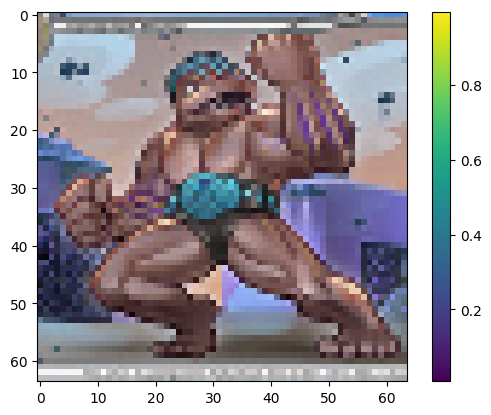

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

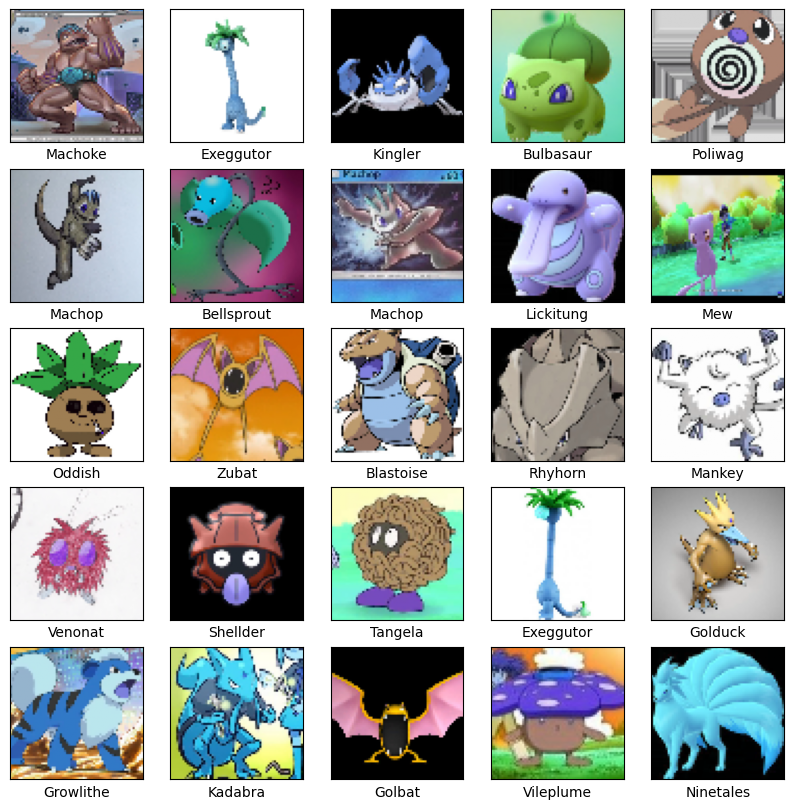

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    class_index = np.argmax(train_labels[i])  # Obtiene el índice de clase a partir del one-hot encoding
    class_name = [k for k, v in label_mapping.items() if v == class_index][0]  # Obtiene el nombre de la carpeta
    plt.xlabel(class_name)
plt.show()

# Creación de la base convolucional

Se inicia la parte en donde comienza a definirse la arquitectura dle modelo de nuestra Red Neuronal Convolucional utilizando desde Keras la clase 'Dropout' con la cual se busca prevenir el sobreajuste de las redes neuronales.

Se crea una capa convolucional con 32 filtros de tamaño (4,4) con la función de activación de tangente hiperbólica.

Al igual se añade una función de MaxPooling con tamaño (4,4) que reduce la dimensionalidad de la capaanterior.

Se añade una capa 'Dropout' con una tasa del 0.25 para prevenir el sobreajuste eliminando aleatoriamente un porcentaje de las neuronas durante el entrenamiento.

Se repiten los pasos y se añade una capa para el aplanamiento 'Flatten' para convertirla en un vector unidimencional.

Se añade una capa densa de 256 neuronas con una función de activación tangente hiperbólica y se agrega nuevamente una capa 'Dropout' con una tasa de 0.7 esta vez con un número mayor para reducir aún más el sobreajuste.

Termina con una capa final de salida en la que se añaden neuronas conforme el número de clases que nuestro conjunto de datos contiene.

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), activation='tanh', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))  # Agrega Dropout después de la capa de MaxPooling

model.add(Conv2D(64, kernel_size=(4, 4), activation='tanh'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))  # Agrega Dropout después de la segunda capa de MaxPooling

model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.7))  # Agrega Dropout antes de la capa Dense
model.add(Dense(num_classes, activation='softmax'))

# Compilación y entrenamieto del modelo

Es en esta parte en donde se realiza la compliación del modelo y se lleva a cabo el entrenamiento usando Early Stopping como un recurso detener el entrenamiento temporalmente en caso de que no exista mejora en la métrica de validación.

Se guardan los parámetros para analizar el rendimiento y las métricas durante el entrenamiento del modelo.

También se evalúan los datos de pérdida y de precisión que se obtuvieron.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

# Definir el Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Entrenar el modelo con Early Stopping
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                    epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
171/171 [==============================] - 27s 149ms/step - loss: 4.8462 - accuracy: 0.0231 - val_loss: 4.2683 - val_accuracy: 0.0909
Epoch 2/50
171/171 [==============================] - 26s 149ms/step - loss: 4.1390 - accuracy: 0.0959 - val_loss: 3.5607 - val_accuracy: 0.2053
Epoch 3/50
171/171 [==============================] - 26s 152ms/step - loss: 3.5866 - accuracy: 0.1595 - val_loss: 3.0294 - val_accuracy: 0.3123
Epoch 4/50
171/171 [==============================] - 26s 153ms/step - loss: 3.2051 - accuracy: 0.2267 - val_loss: 2.7306 - val_accuracy: 0.3688
Epoch 5/50
171/171 [==============================] - 24s 139ms/step - loss: 2.8906 - accuracy: 0.2878 - val_loss: 2.4553 - val_accuracy: 0.4223
Epoch 6/50
171/171 [==============================] - 27s 160ms/step - loss: 2.6508 - accuracy: 0.3339 - val_loss: 2.3206 - val_accuracy: 0.4296
Epoch 7/50
171/171 [==============================] - 26s 152ms/step - loss: 2.4468 - accuracy: 0.3823 - val_loss: 2.0848 - val_ac

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

43/43 [==============================] - 1s 34ms/step - loss: 1.3309 - accuracy: 0.6430
Loss: 1.3309
Accuracy: 0.6430


# Evaluación del modelo

Se busca obtener un gráfico en donde veamos la comaración entre las métricas de entrenamiento y validación del historial del entrenamiento y validación que hubo en cada una de las épicas de entrenamiento.

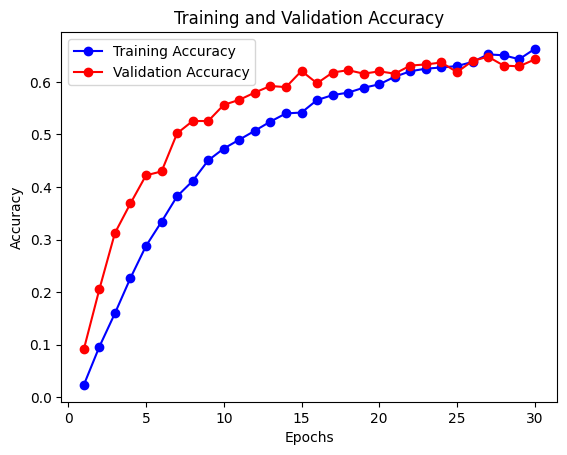

In [ ]:
# Obtener las métricas de entrenamiento y validación
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Crear el gráfico de precisión de entrenamiento vs. precisión de validación
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Realización de predicciones

Es aquí donde se generan las predicciones utilizando el modelo que anteriormente fue entrenado con el conjunto de imágenes de prueba, mostrar las imágenes con ayuda de gráficas, en ellas se muestran las imágenes de conjunto de prueba junto con su predicción. Cada una de las imágenes muestra una etiqueta en donde vemos la verdadera etiqueta y la que fue predicha por el modelo junto con el porcentaje de acierto que se tuvo. También se muentran en color rojo si es que no hizo una buena predicción y en azún si logró hacer una predicción correcta de la imágen.

43/43 [==============================] - 2s 43ms/step


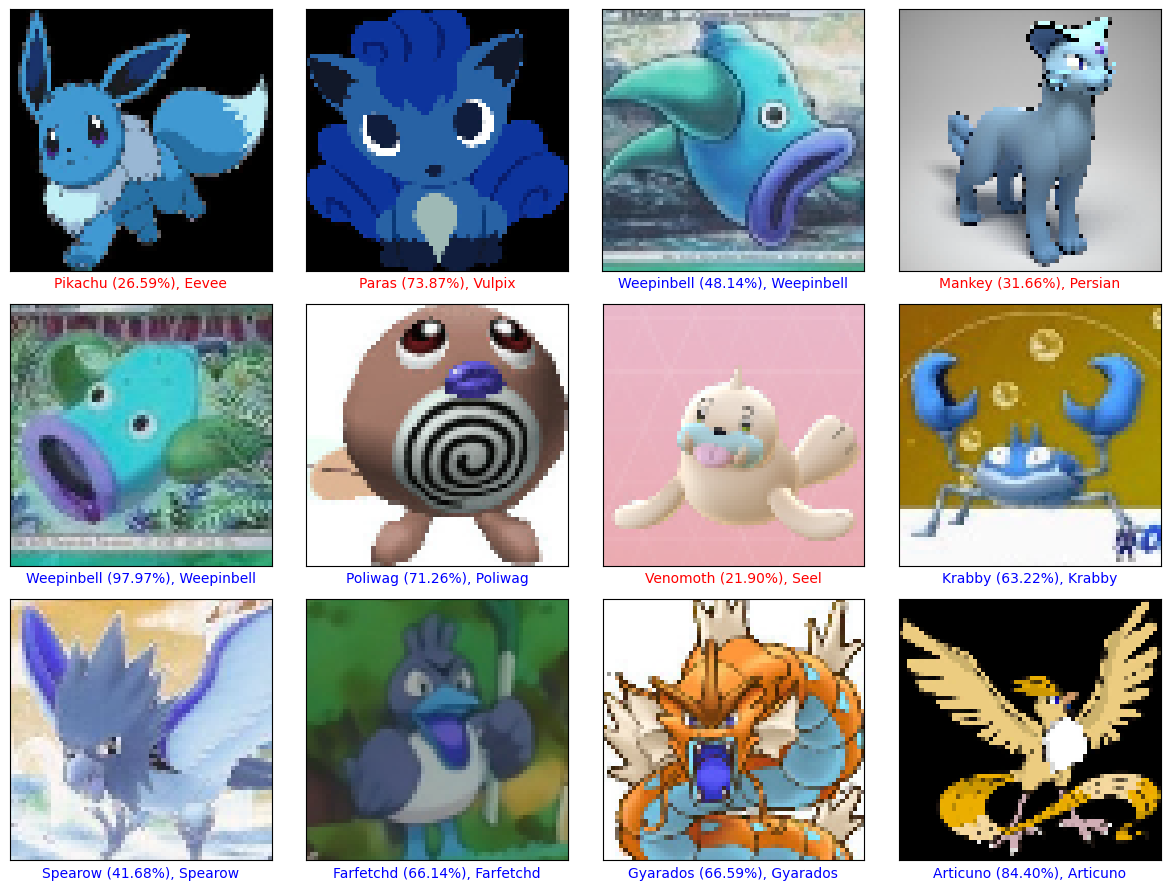

In [ ]:
# Generar predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Definir la función para graficar la imagen y su predicción
def plot_image_with_prediction(i, predictions_array, true_labels, images_array):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_array[i], cmap=plt.cm.binary)

    predicted_label_index = np.argmax(predictions_array)
    true_label_index = np.argmax(true_labels[i])
    predicted_label = list(label_mapping.keys())[list(label_mapping.values()).index(predicted_label_index)]
    true_label = list(label_mapping.keys())[list(label_mapping.values()).index(true_label_index)]

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} ({:.2f}%), {}".format(predicted_label, 100*np.max(predictions_array), true_label), color=color)

# Definir el número de filas y columnas para mostrar las imágenes
num_rows = 3
num_cols = 4
num_images = num_rows * num_cols

# Crear el gráfico de las imágenes con su predicción
plt.figure(figsize=(3*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image_with_prediction(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()